## Ames Feature Engineering and data cleansing

In [125]:
import pandas as pd
import numpy as np
import plotly
import plotly.plotly as py
from scipy import stats
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


#Setting for pandas to show all columns
pd.set_option('display.max_columns', None)

#### Read data and merge train and test

In [126]:
#We read the data and create a Data Frame with the whole dataset

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


# Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

# Now drop the 'Id' colum since we cannot use it as a feature to train our model.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

y_train = train['SalePrice']
X_train = train.drop('SalePrice', axis=1)
#copy of our test data in order ot recover thes dataset
X_test = test.copy()

all_data = pd.concat([X_train, X_test], ignore_index=True)
#all_data.info()

In [127]:
#Inspect which columns have null values

all_data.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF2          1
BsmtFinSF1          1
Exterior2nd         1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior1st         1
SaleType            1
                 ... 
YearRemodAdd        0
YearBuilt           0
SaleCondition       0
HeatingQC           0
ExterQual           0
ExterCond           0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF

#### Adressing null values

We impute 'Unavaiblable' to all text columns with null values and 0 to all the numeric ones.

Imputing 0 to all numeric variables with NA is somthing needs to be done with care since can carry some undesired side effects, since we are actually changing the distribution of the data, means and mendians. In this particualr cases and after datra inspection we see that actually the columns most affected seem to be of very low importance so this shoulndt affect too much.

In [128]:
#Impute value 0 to the numeric columns and unavailable to the object ones



for c in all_data.columns:
    if all_data[c].dtype == 'object':
        all_data[c] = all_data[c].fillna('Unavailable')
    else:
        all_data[c] = all_data[c].fillna(0)       
            

#all_data.isnull().sum().sort_values(ascending=False)

all_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,30,C (all),60.0,7879,Pave,Unavailable,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495.0,Unf,0.0,225.0,720.0,GasA,TA,N,FuseA,720,0,0,720,0.0,0.0,1,0,2,1,TA,4,Typ,0,Unavailable,Unavailable,0.0,Unavailable,0.0,0.0,Unavailable,Unavailable,N,0,523,115,0,0,0,Unavailable,GdWo,Unavailable,0,11,2009,WD,Abnorml
1,20,C (all),50.0,9000,Pave,Unavailable,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50.0,Unf,0.0,430.0,480.0,GasA,TA,N,FuseA,480,0,0,480,1.0,0.0,0,0,1,1,TA,4,Typ,0,Unavailable,Detchd,1958.0,Unf,1.0,308.0,TA,TA,Y,0,0,0,0,0,0,Unavailable,Unavailable,Unavailable,0,10,2006,WD,Abnorml
2,50,RM,50.0,5925,Pave,Unavailable,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,3,6,1910,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,600.0,600.0,Grav,Fa,N,SBrkr,600,368,0,968,0.0,0.0,1,0,2,1,TA,6,Typ,0,Unavailable,Unavailable,0.0,Unavailable,0.0,0.0,Unavailable,Unavailable,Y,0,0,0,0,0,0,Unavailable,GdWo,Unavailable,0,5,2009,WD,Abnorml
3,20,RL,50.0,5000,Pave,Unavailable,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,Unavailable,Unavailable,Unavailable,Unavailable,0.0,Unavailable,0.0,0.0,0.0,GasA,Fa,N,FuseF,334,0,0,334,0.0,0.0,1,0,1,1,Fa,2,Typ,0,Unavailable,Unavailable,0.0,Unavailable,0.0,0.0,Unavailable,Unavailable,N,0,0,0,0,0,0,Unavailable,Unavailable,Unavailable,0,1,2007,WD,Normal
4,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,649.0,649.0,GasA,TA,N,SBrkr,649,668,0,1317,0.0,0.0,1,0,3,1,TA,6,Typ,0,Unavailable,Detchd,1920.0,Unf,1.0,250.0,TA,Fa,N,0,54,172,0,0,0,Unavailable,MnPrv,Unavailable,0,7,2008,WD,Normal


#### Facrtorizing

We categorize the columns that although being numeric represent categories. This way we avoid classification methods like trees to give strange results, i.e: an Overall Quality of 4.5 means actually not much in this context. 

We evaluated which columns needed to be changed and transformed to categories.

In [129]:
#Creating categoriesof  numeric columns that are actually categories

#MSSubClass
#OverallQual
#OverallCond
#GarageCars
#YrSold

all_data["MSSubClass"]= all_data["MSSubClass"].astype('category')
all_data["OverallQual"]= all_data["OverallQual"].astype('category')
all_data["OverallCond"]= all_data["OverallCond"].astype('category')
all_data["GarageCars"]= all_data["GarageCars"].astype('category')
all_data["YrSold"]= all_data["YrSold"].astype('category')

#Chekcing trnasformation has been done correctly
all_data.dtypes.head(10)

MSSubClass     category
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
dtype: object

### Feature engineering

After assessing some of the variables we believe that some of them can be combined and this way affect in a greater proportion to the Sale Price than not as separated ones. Therefore we combine this.

Also there are cases that what affects more the price is the fact that there is a binary classification, tehre is Pool yes or no for example than not the actual characteristics fo the pool or Fireplace. 

In [130]:
#Lets feature engineeer two variables from numerical ones to Yes/No
#We are interested in finding out if we have pool or not, if we have fireplace or not

all_data['Fireplaces'] = np.where(all_data['Fireplaces'] == 0, 'No', 'Yes')

all_data.Fireplaces.value_counts()

Yes    1499
No     1420
Name: Fireplaces, dtype: int64

In [131]:
#Method 2 to achieve the same purpose this time with the loc function.

all_data['PoolArea'] = all_data['PoolArea'].astype(str)

all_data.loc[all_data.PoolArea!='0','PoolArea'] = 'Yes'
all_data.loc[all_data.PoolArea=='0','PoolArea'] = 'No'

all_data.PoolArea.value_counts()


No     2906
Yes      13
Name: PoolArea, dtype: int64

#### Combine some of the data columns

In [132]:
#We combine all the total sqf in order to have jsut one variable

all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
#and drop the columns
all_data.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'], inplace=True, axis=1)



In [133]:
#Then we do the same for the baths
all_data['TotalBath'] = all_data['BsmtFullBath'] + all_data['FullBath'] + all_data['HalfBath'] + all_data['BsmtHalfBath']
#and drop the columns
all_data.drop(['HalfBath','FullBath','BsmtHalfBath','BsmtFullBath'], inplace=True, axis=1)

In [134]:
#lets aggreagete all teh porchs sf into one

all_data['TotalPorchSF']  = all_data['WoodDeckSF'] + all_data['OpenPorchSF'] + all_data['EnclosedPorch']  + all_data['3SsnPorch'] + all_data['ScreenPorch']
all_data.drop(['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'], inplace=True, axis=1)

In [136]:
#Lets also save this dataset
all_data.to_csv('all_data.csv')

all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalBath,TotalPorchSF
0,30,C (all),60.0,7879,Pave,Unavailable,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495.0,Unf,0.0,225.0,GasA,TA,N,FuseA,0,720,2,1,TA,4,Typ,No,Unavailable,Unavailable,0.0,Unavailable,0.0,0.0,Unavailable,Unavailable,N,No,Unavailable,GdWo,Unavailable,0,11,2009,WD,Abnorml,1440.0,1.0,638
1,20,C (all),50.0,9000,Pave,Unavailable,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50.0,Unf,0.0,430.0,GasA,TA,N,FuseA,0,480,1,1,TA,4,Typ,No,Unavailable,Detchd,1958.0,Unf,1.0,308.0,TA,TA,Y,No,Unavailable,Unavailable,Unavailable,0,10,2006,WD,Abnorml,960.0,1.0,0
2,50,RM,50.0,5925,Pave,Unavailable,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,3,6,1910,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,600.0,Grav,Fa,N,SBrkr,0,968,2,1,TA,6,Typ,No,Unavailable,Unavailable,0.0,Unavailable,0.0,0.0,Unavailable,Unavailable,Y,No,Unavailable,GdWo,Unavailable,0,5,2009,WD,Abnorml,1568.0,1.0,0
3,20,RL,50.0,5000,Pave,Unavailable,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,Unavailable,Unavailable,Unavailable,Unavailable,0.0,Unavailable,0.0,0.0,GasA,Fa,N,FuseF,0,334,1,1,Fa,2,Typ,No,Unavailable,Unavailable,0.0,Unavailable,0.0,0.0,Unavailable,Unavailable,N,No,Unavailable,Unavailable,Unavailable,0,1,2007,WD,Normal,334.0,1.0,0
4,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,649.0,GasA,TA,N,SBrkr,0,1317,3,1,TA,6,Typ,No,Unavailable,Detchd,1920.0,Unf,1.0,250.0,TA,Fa,N,No,Unavailable,MnPrv,Unavailable,0,7,2008,WD,Normal,1966.0,1.0,226


In [137]:
all_data.shape

#Notice we reduced the number of variables to 70

(2919, 70)

So we are done with the feature engineering, now with this dataset we will do the feature selection but first we will need to transform the categorical variables so our models can be run.

### Categorical variables

We need to work on categorical variables to be able to feed the different models. For this purpose we will be creating two training models so we can fit in linear and tree models. So:

- One hot enconder train dataset for linear models
- Label enconder for the tree based algorithms

#### One hot enconder

In [138]:
#First we inspect the number of categories, rememeber each category will be a different column

#we are getting the number of categories in each column basically

for c in all_data.columns:
    if all_data[c].dtype != 'float64' and all_data[c].dtype != 'int64' :
        print(c, len(all_data[c].value_counts()))

#We see some potential problems with columns with a lot of categories

#MSSubClass 16
#Neighborhood 25
#Exterior1st 16
#Exterior2nd 17

MSSubClass 16
MSZoning 6
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 3
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
RoofStyle 6
RoofMatl 8
Exterior1st 16
Exterior2nd 17
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 5
Functional 8
Fireplaces 2
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageCars 6
GarageQual 6
GarageCond 6
PavedDrive 3
PoolArea 2
PoolQC 4
Fence 5
MiscFeature 5
YrSold 5
SaleType 10
SaleCondition 6


In [139]:
#We use one hot enconder to dummify the variables for our linear train dataset. 

one_hot_all_data = pd.get_dummies(all_data, drop_first=True, dummy_na=True)
one_hot_all_data.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,MiscVal,MoSold,TotalSF,TotalBath,TotalPorchSF,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_150.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSSubClass_nan,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_Unavailable,MSZoning_nan,Street_Pave,Street_nan,Alley_Pave,Alley_Unavailable,Alley_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_NoSeWa,Utilities_Unavailable,Utilities_nan,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,OverallQual_2.0,OverallQual_3.0,OverallQual_4.0,OverallQual_5.0,OverallQual_6.0,OverallQual_7.0,OverallQual_8.0,OverallQual_9.0,OverallQual_10.0,OverallQual_nan,OverallCond_2.0,OverallCond_3.0,OverallCond_4.0,OverallCond_5.0,OverallCond_6.0,OverallCond_7.0,OverallCond_8.0,OverallCond_9.0,OverallCond_nan,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_Unavailable,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Unavailable,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unavailable,MasVnrType_nan,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterCond_nan,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Unavailable,BsmtQual_nan,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_Unavailable,BsmtCond_nan,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Unavailable,BsmtExposure_nan,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unavailable,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unavailable,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,Heatin

In [140]:
one_hot_all_data.shape

#we ahve now way more columns as the shape indicates

(2919, 345)

#### Label encoding

- Give every categorial variable a unique numerical ID
- Useful for non-linear tree-based algorithm
- Does not increase dimensionality

In [141]:
from sklearn.preprocessing import LabelEncoder

labelenc_all_data = all_data.copy()

for c in labelenc_all_data.columns:
    if all_data[c].dtype != 'float64' or all_data[c].dtype != 'int64':
        le = LabelEncoder()
        # Need to convert the column type to string in order to encode missing values
        labelenc_all_data[c] = le.fit_transform(labelenc_all_data[c].astype(str))
        #print(le.classes_) #this lets you know the actual labels used

#All columns are now integer        

#labelenc_all_data.info()

#### Redo the train and test dataset for our analysis

Now we have two sets of data for linear and non linear models thta we will be calling:

- x_train_linear
- x_train_tree

The difference will be the method we use for enconding the different variables

In [142]:
#y_train stays the same

####
# For our linear models
####

X_train_linear = one_hot_all_data.drop(one_hot_all_data.index[(len(test))+1:], axis=0) #we basically use the len of the test dataset to delete the rows
X_test_linear = one_hot_all_data.drop(one_hot_all_data.index[:(len(test))+1:], axis=0)

print('Shape of X_train_linear: ' + str(X_train_linear.shape))
print('Shape of X_test_linear: ' + str(X_test_linear.shape))

####
# For our tree models
####

X_train_tree = labelenc_all_data.drop(labelenc_all_data.index[(len(test))+1:], axis=0) #we basically use the len of the test dataset to delete the rows
X_test_tree = labelenc_all_data.drop(labelenc_all_data.index[:(len(test))+1:], axis=0)

print('Shape of X_train_tree: ' + str(X_train_tree.shape))
print('Shape of X_test_tree: ' + str(X_test_tree.shape))


####
##Another method
##train_preprocessed = dataset_preprocessed[ : train]
##test_preprocessed = dataset_preprocessed[test : ]



Shape of X_train_linear: (1460, 345)
Shape of X_test_linear: (1459, 345)
Shape of X_train_tree: (1460, 70)
Shape of X_test_tree: (1459, 70)


## Feature selection

Prior to run our models we will assess which varibales have more importance, for that purpose we will use different methodologies and the input train set will also depend on these methodologies. 

These are:

- PCA
- Lasso (SelectFromModel)
- Tree (SelectFromModel)

Some extra documentation can be found here: http://scikit-learn.org/stable/modules/feature_selection.html#l1-feature-selection

### PCA Analysis

PCA Preprocessing

    - Only numeric data
    - NaNs not accepted

PCA Steps

    - Standardize the data.
    - Use the standardized data to create a covariance matrix.
    - Use the resulting matrix to calculate eigenvectors (principal components) and their corresponding eigenvalues.
    - Sort the components in decending order by its eigenvalue.
    - Choose n components which explain the most variance within the data (larger eigenvalue means the feature explains more variance).
    - Create a new matrix using the n components.

In [164]:

#Standardize the data.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
train_PCA = scaler.transform(X_train)

from  sklearn.decomposition import PCA

#Calculate the PCA so the selected variables explain at least 90% of the variance of our model 0.90
pca = PCA(0.95)

#Fit PCA on training set.
pca.fit_transform(train_PCA)




#We get the resutls of teh PCA in a csv file, and also print the total in the notebook
print(pca.n_components_)
results_PCA = pd.DataFrame(pca.components_,columns=one_hot_df.columns)
results_PCA.to_csv('resultsPCA.csv')
#print(pca.components_)




#Apply the mapping (transform) to both the training set and the test set.
train_PCA = pca.transform(train_PCA)

#which is the variance ratio of each component?
#print(pca.explained_variance_ratio_)
print(abs( pca.components_ ))

#and the total cumulutative
cumsum = np.cumsum(pca.explained_variance_ratio_*100)
#print(cumsum) # we see reaches 90%

178
[[0.03135893 0.03159297 0.19871559 ... 0.043932   0.09637614 0.        ]
 [0.0345774  0.05012684 0.01544883 ... 0.08713552 0.10478536 0.        ]
 [0.01256712 0.07290768 0.06218102 ... 0.00618049 0.02237129 0.        ]
 ...
 [0.05476945 0.09500748 0.02747325 ... 0.01368518 0.00800946 0.        ]
 [0.0310182  0.08603496 0.01096324 ... 0.09309546 0.0495718  0.        ]
 [0.05108461 0.06570598 0.01949724 ... 0.04218393 0.00140332 0.        ]]


Text(0,0.5,'cumulative explained variance')

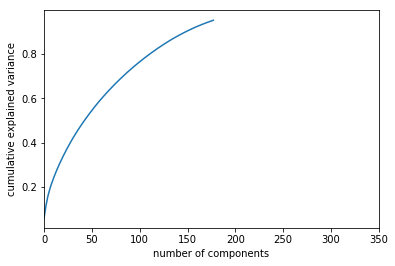

In [151]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,350)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Lasso Regression

In [160]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.7, tol=0.1) #arbitraly increased tol cos was having a warning, not sure what that does
lasso_reg.fit(X_train,y_train)

print(lasso_reg.score)

<bound method RegressorMixin.score of Lasso(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.1, warm_start=False)>


In [113]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495.0,Unf,0.0,225.0,720.0,GasA,TA,N,FuseA,720,0,0,720,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml
1,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50.0,Unf,0.0,430.0,480.0,GasA,TA,N,FuseA,480,0,0,480,1.0,0.0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1958.0,Unf,1.0,308.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml
2,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,3,6,1910,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,600.0,600.0,Grav,Fa,N,SBrkr,600,368,0,968,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml
3,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,FuseF,334,0,0,334,0.0,0.0,1,0,1,1,Fa,2,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal
4,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,649.0,649.0,GasA,TA,N,SBrkr,649,668,0,1317,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1.0,250.0,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal


#### Tree importance selector

From here: http://scikit-learn.org/stable/modules/feature_selection.html#l1-feature-selection

In [143]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

forest = ExtraTreesClassifier(n_estimators=250, #num of trees run
                              criterion='gini', #method for estimating the split in each node
                              min_samples_leaf=5, #minimum number of features in each tree
                              random_state=0)
forest = forest.fit(X_train_tree, y_train)
importances = forest.feature_importances_  


#to get the name of the variables selected
model = SelectFromModel(forest, prefit=True)
feature_indices = model.get_support()
feature_name = X_train_tree.columns[feature_indices]

X_new = model.transform(X_train_tree)
X_new.shape #(1460, 37)

(1460, 37)

In [145]:
feature_indices

array([ True, False,  True,  True, False, False,  True, False, False,
        True, False,  True, False, False, False,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True, False,  True,  True,  True, False, False,
        True, False,  True, False, False, False,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True, False, False,  True,  True,  True])

These are the 37 features selected by the model, not in order I believe

Nice package to visualize the results of feature_importances: **yellowbrick**

http://www.scikit-yb.org/en/latest/api/features/importances.html

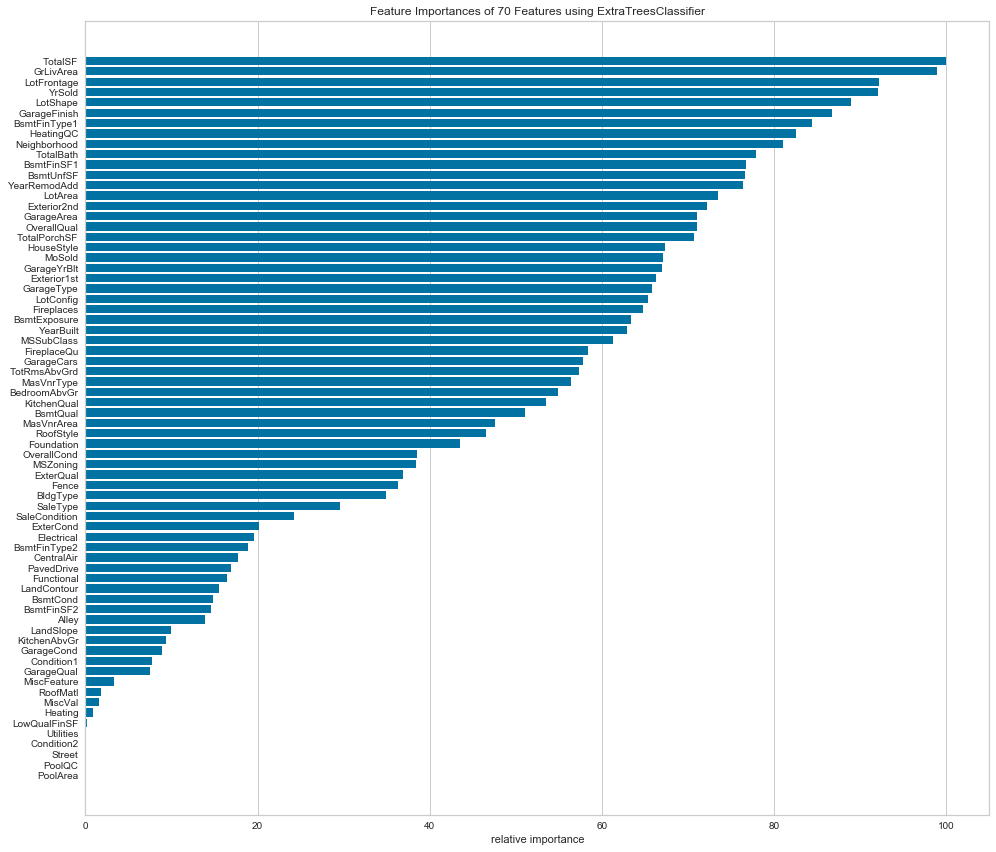

In [123]:
from yellowbrick.features.importances import FeatureImportances

# Create a new matplotlib figure
graph = plt.figure(figsize=(14, 12)).add_subplot()
viz = FeatureImportances(forest, ax=graph, relative=True)
viz.fit(X_train_tree, y_train)
viz.poof()

Example tree from: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Feature ranking:
1. feature 67 (0.032153)
2. feature 42 (0.031827)
3. feature 2 (0.029642)
4. feature 64 (0.029623)
5. feature 6 (0.028603)
6. feature 52 (0.027890)
7. feature 32 (0.027148)
8. feature 38 (0.026554)
9. feature 11 (0.026040)
10. feature 68 (0.025045)
11. feature 33 (0.024673)
12. feature 36 (0.024638)
13. feature 19 (0.024546)
14. feature 3 (0.023617)
15. feature 23 (0.023212)
16. feature 54 (0.022847)
17. feature 16 (0.022841)
18. feature 69 (0.022723)
19. feature 15 (0.021637)
20. feature 63 (0.021557)
21. feature 51 (0.021554)
22. feature 22 (0.021319)
23. feature 50 (0.021158)
24. feature 9 (0.021027)
25. feature 48 (0.020824)
26. feature 31 (0.020386)
27. feature 18 (0.020228)
28. feature 0 (0.019699)
29. feature 49 (0.018783)
30. feature 53 (0.018594)
31. feature 46 (0.018454)
32. feature 24 (0.018120)
33. feature 43 (0.017638)
34. feature 45 (0.017196)
35. feature 29 (0.016424)
36. feature 25 (0.015304)
37. feature 20 (0.014971)
38. feature 28 (0.013993)
39. featu

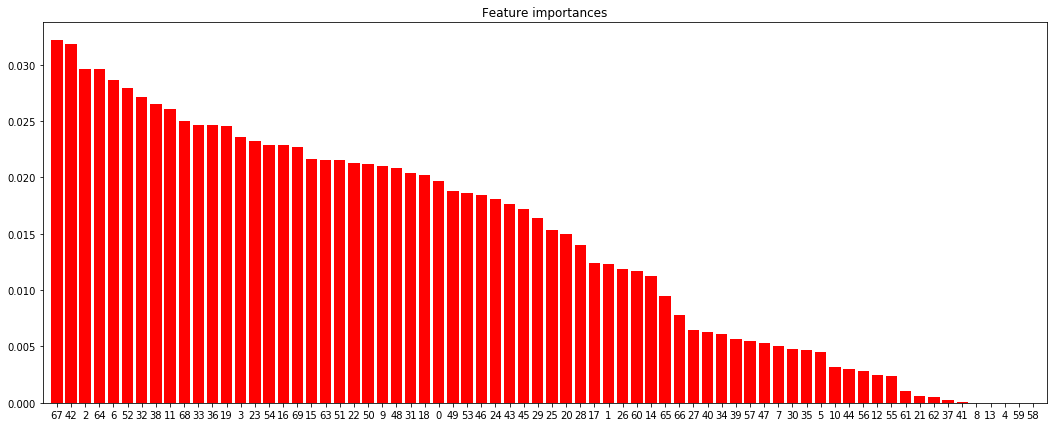

In [99]:
from sklearn.ensemble import ExtraTreesClassifier
# Build a forest and compute the feature importances
forest2 = ExtraTreesClassifier(n_estimators=250, #num of trees run
                              criterion='gini', #method for estimating the split in each node
                              min_samples_leaf=5, #minimum number of features in each tree
                              random_state=0)

#we fit the model
forest2.fit(X_train_tree, y_train)

#feature_importnaces_ contains the information we are really interested in
importances2 = forest2.feature_importances_

#Compute the standard deviation along the specified axis.
std = np.std([importances2 for tree in forest2.estimators_],axis=0)

model2 = SelectFromModel(forest2, prefit=True)
feature_indices2 = model2.get_support()
feature_name2 = X_train_tree.columns[feature_indices]

#this is just for sorting
indices = np.argsort(importances2)[::-1] #reverse the list slicing

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_tree.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(18, 7))
plt.title("Feature importances")
plt.bar(range(X_train_tree.shape[1]), importances2[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_tree.shape[1]), indices)
plt.xlim([-1, X_train_tree.shape[1]])
plt.show()

In [162]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = X_train, y_train
X.shape

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape # = (1460,15)

(1460, 15)